<div align=center>

<p></p>
<p></p>
<font size=5>

<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Winter 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 2 - Q4
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  April the fifth


<br/>
<br/>
<b>

Kian Izadpanah 400104783
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials. 
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5. 

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [18]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    # TODO: Generate the dataset with
    noise = np.random.normal(0, noise_std, num_samples)
    X = x_values = np.linspace(-4, -1, num_samples)
    y = (0.1*X**5 + X**4 - 2*X**3  + 7*X**2 - 9*X + 3) + noise
    return X, y

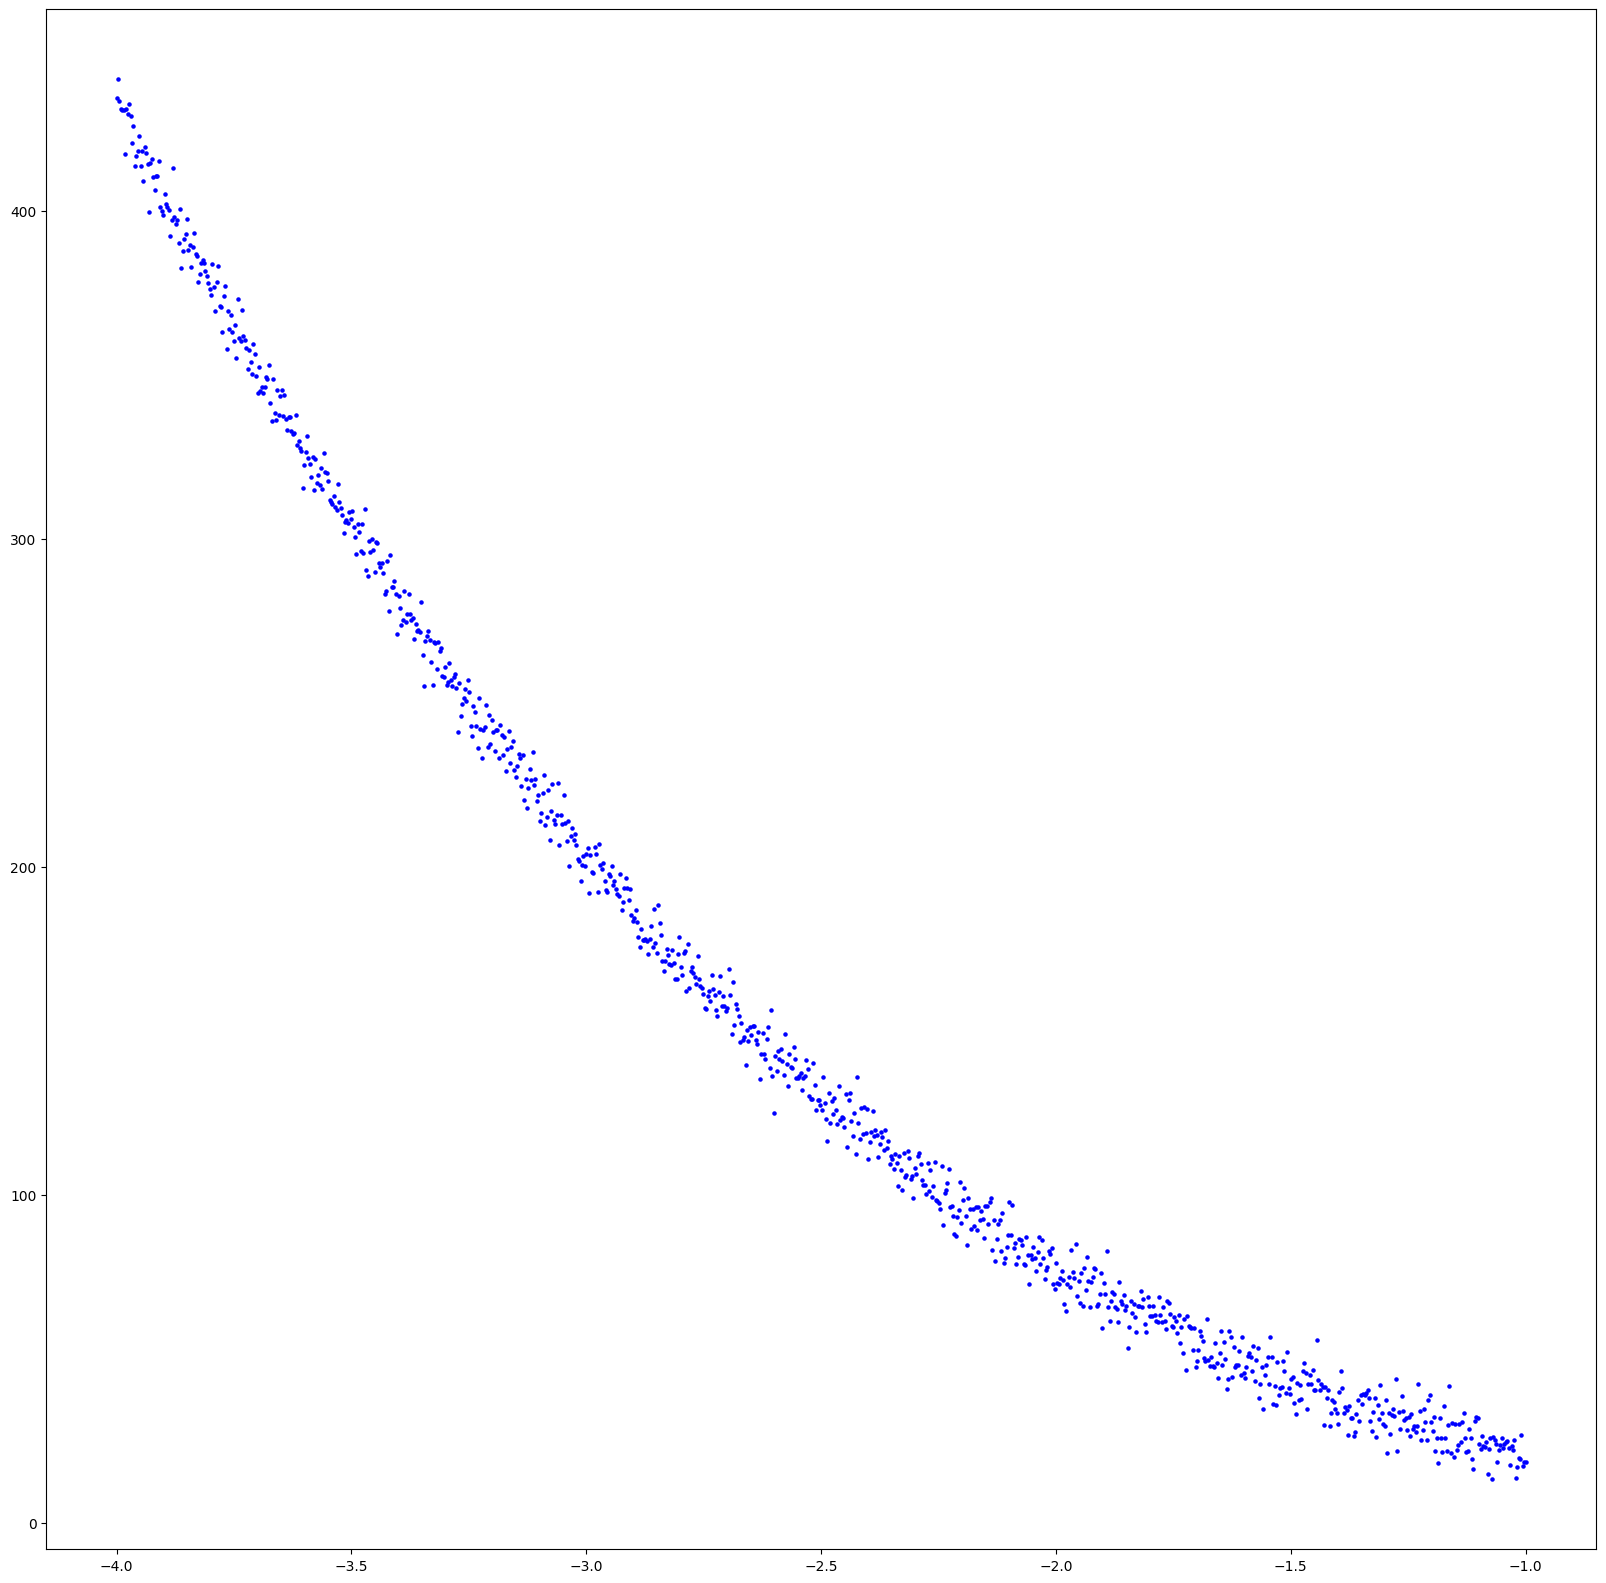

In [45]:
import matplotlib.pyplot as plt
X, y = generate_dataset(-4, -1, 1000)
plt.figure(figsize=(20, 20))
plt.scatter(X, y, color='blue', s=5)
plt.show()

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [46]:
from sklearn.model_selection import train_test_split

degree = 5

# TODO: Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.5, shuffle=True)

# TODO: Generate out-of-range testing set
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, 500)

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def train_polynomial_regression(X, y, degree):
    # TODO: train the model based on the given degree
    X = X.reshape(-1, 1)
    model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())])
    model.fit(X, y)
    return model

In [48]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [49]:
from sklearn.metrics import mean_squared_error as MSE
def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate each model's loss on the sets.
    X_test = X_test.reshape(-1, 1)
    for d in range(2, degree + 3):
        pred = models[d].predict(X_test)
        losses[d] = MSE(pred, y_test)
    return losses

In [50]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change. 


Text(0.5, 1.0, 'out of range losses')

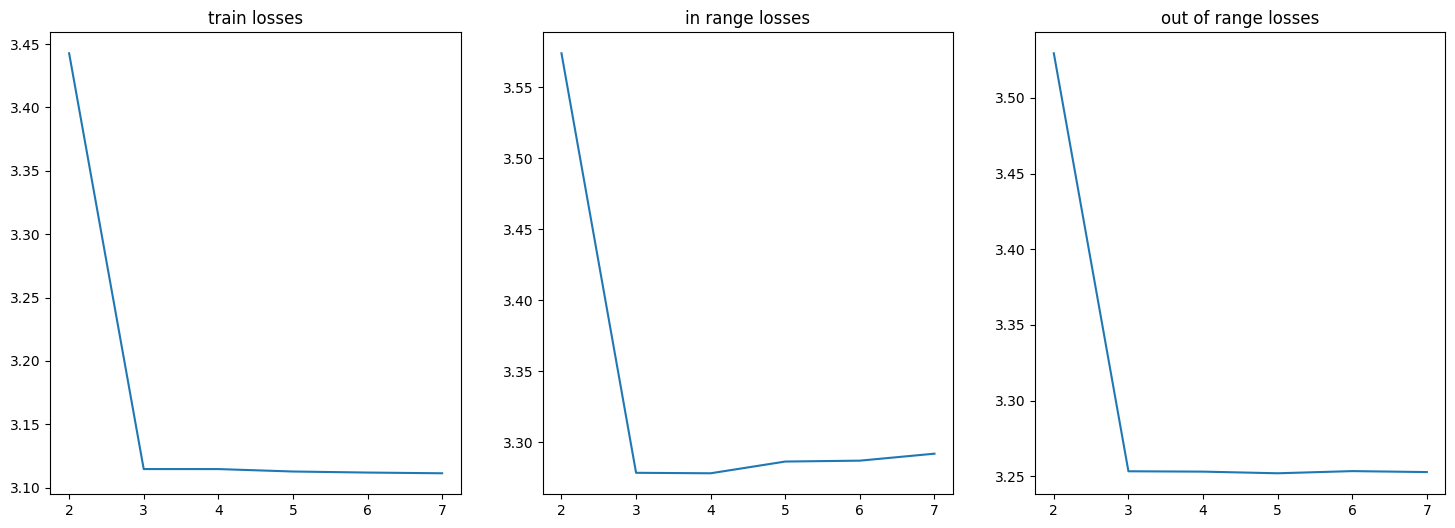

In [51]:
from matplotlib import pyplot as plt

# TODO: Plot the logarithm of loss based on the model degrees from 3 to 7

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
degrees = list(range(2, degree + 3))
# TODO: Plot logarithm of losses of training set
l = []
for d in range(2, degree + 3):
    l.append(np.log(losses_train[d]))
ax1.plot(degrees, l)
ax1.set_title("train losses")

# TODO: Plot logarithm of losses of in-range test set
l = []
for d in range(2, degree + 3):
    l.append(np.log(losses_in_range[d]))
ax2.plot(degrees, l)
ax2.set_title("in range losses")

# TODO: Plot logarithm of losses of out-of-range test set
l = []
for d in range(2, degree + 3):
    l.append(np.log(losses_out_of_range[d]))
ax3.plot(degrees, l)
ax3.set_title("out of range losses")

## Conclusion (10 Points)

Now print out the losses on each set here. 

In [52]:
# TODO: print each model loss on the training and the two test sets
print("Training Set Losses:", losses_train)
print("In-range Test Set Losses:", losses_in_range)
print("Out-of-range Test Set Losses:", losses_out_of_range)

Training Set Losses: {2: 31.269851593401654, 3: 22.52649231736159, 4: 22.526222804955097, 5: 22.483060929636906, 6: 22.464502642905227, 7: 22.451707217168874}
In-range Test Set Losses: {2: 35.65207438784723, 3: 26.53254513600433, 4: 26.52357978406334, 5: 26.743648136496244, 6: 26.760415159804353, 7: 26.892276735151775}
Out-of-range Test Set Losses: {2: 34.10601575688185, 3: 25.87476204926961, 4: 25.868546851598307, 5: 25.840473040490835, 6: 25.877535882158703, 7: 25.86107995849244}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

Comparing the loss (mean squared error, MSE) of a polynomial regression model on different datasets, especially with varying polynomial degrees, can provide valuable insights into the bias-variance trade-off, overfitting, and the model's generalization ability. Let's break down these concepts:

# Bias-Variance Trade-Off
- **Bias** refers to the error due to overly simplistic assumptions in the model. High bias can cause the model to miss relevant relations between features and target outputs (underfitting).

- **Variance** refers to the error due to too much complexity in the model. High variance can cause the model to model the random noise in the training data, rather than the intended outputs (overfitting).

A good model needs to balance bias and variance, minimizing total error.

# Analyzing Losses
## Training Set vs. In-Range Test Set:

- If a model has a low MSE on the training set but a significantly higher MSE on the in-range test set, it is likely overfitting. This means the model performs well on data it has seen but fails to generalize to new, yet similar, data.

- As the degree of the polynomial increases, the model can become more complex. A complex model (high-degree polynomial) can fit the training data very closely, leading to low bias but potentially high variance.

## In-Range Test Set vs. Out-of-Range Test Set:

- If the model performs well on both the training set and the in-range test set but poorly on the out-of-range test set, it indicates a limitation in the model's ability to generalize beyond the range of data it was trained on.

- This is a common issue with polynomial regression, as higher-degree polynomials can exhibit extreme behavior outside the range of the training data.

# Overfitting and Generalization
- **Overfitting** occurs when the model learns patterns that are specific to the training data, including noise, rather than capturing the underlying data distribution. This is often seen with high-complexity models.

- **Generalization** refers to the model's ability to perform well on new, unseen data that comes from the same distribution as the training data.

# Conclusion
- A model with low-degree polynomial may have high bias and low variance, potentially underfitting the data (simplistic model).

- A model with high-degree polynomial may have low bias but high variance, risking overfitting (complex model).

- A model that generalizes well will perform similarly on both training and testing datasets.

- The key is to find the degree of polynomial that provides the best trade-off between bias and variance, effectively generalizing to new data without overfitting.

By comparing MSE across these different datasets and considering polynomial degrees, we can tune our model to strike the right balance, achieving better generalization and predictive performance.